In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing data
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [5]:
#check missing values
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
#No missing values identified in the data

In [7]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [9]:
#checking if all values in the column start with substring 'id'
all(data['id'].str.startswith('id'))

True

In [11]:
# Converting id column to normal numbers
data['id']=data['id'].apply(lambda x: x[2:])

In [13]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [15]:
#Converting id to integer and store & forward flag to category data type. Vendor_id only has values 1 & 2, hence it should be made categorical
data['id']=data['id'].astype('Int64')
data['store_and_fwd_flag']=data['store_and_fwd_flag'].astype('category')
data['vendor_id']=data['vendor_id'].astype('category')

In [17]:
#Converting datetime objects
pickup_date_time = pd.DatetimeIndex(data['pickup_datetime'])
drop_date_time = pd.DatetimeIndex(data['dropoff_datetime'])

In [19]:
data['doy_pickup'] = pickup_date_time.dayofyear
data['moy_pickup'] = pickup_date_time.month
data['dow_pickup'] = pickup_date_time.dayofweek
data['hour_pickup'] = pickup_date_time.hour

data['doy_drop'] = drop_date_time.dayofyear
data['moy_drop'] = drop_date_time.month
data['dow_drop'] = drop_date_time.dayofweek
data['hour_drop'] = drop_date_time.hour

In [21]:
data = data.drop(columns = ['pickup_datetime','dropoff_datetime'])
data.dtypes

id                       Int64
vendor_id             category
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
doy_pickup               int32
moy_pickup               int32
dow_pickup               int32
hour_pickup              int32
doy_drop                 int32
moy_drop                 int32
dow_drop                 int32
hour_drop                int32
dtype: object

In [23]:
# Numerical datatypes
data.select_dtypes(include=['Int64','float64','int32']).dtypes

id                     Int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
doy_pickup             int32
moy_pickup             int32
dow_pickup             int32
hour_pickup            int32
doy_drop               int32
moy_drop               int32
dow_drop               int32
hour_drop              int32
dtype: object

In [25]:
pickup_timing = ['doy_pickup','moy_pickup','dow_pickup','hour_pickup']
drop_timing = ['doy_drop','moy_drop','dow_drop','hour_drop']
lat_long = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']
others = ['passenger_count','trip_duration']

In [27]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
    ''' 
    Univariate_Analysis_numeric
    takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    '''

    size = len(var_group)
    plt.figure(figsize = (7*size,4), dpi = 100)

    #looping for each variable
    for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
        mini = round(data[i].min(), 2)
        maxi = round(data[i].max(), 2)
        ran = round(data[i].max()-data[i].min(), 2)
        mean = round(data[i].mean(), 2)
        median = round(data[i].median(), 2)
        st_dev = round(data[i].std(), 2)
        skew = round(data[i].skew(), 2)
        kurt = round(data[i].kurtosis(), 2)

        # calculating points for range of within one standard deviation
        points = round(mean-st_dev, 2), round(mean+st_dev, 2)

        #Plotting the variable with every information, can change marker size in scatterplot(i.e. s=60)
        plt.subplot(1,size,j+1)
        sns.kdeplot(x=data[i], fill=True)
        sns.lineplot(x=points, y=[0,0], color = 'black', label = "within 1 std_dev")
        sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = f"min&max={mini}&{maxi}")
        sns.scatterplot(x=[mean], y=[0], color = 'red', label = f"mean={mean}")
        sns.scatterplot(x=[median], y=[0], color = 'blue', label = f"median={median}")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title(f'within 1 std_dev={points[0]} to {points[1]};kurtosis={kurt};\n skew = {skew};range = {ran}')

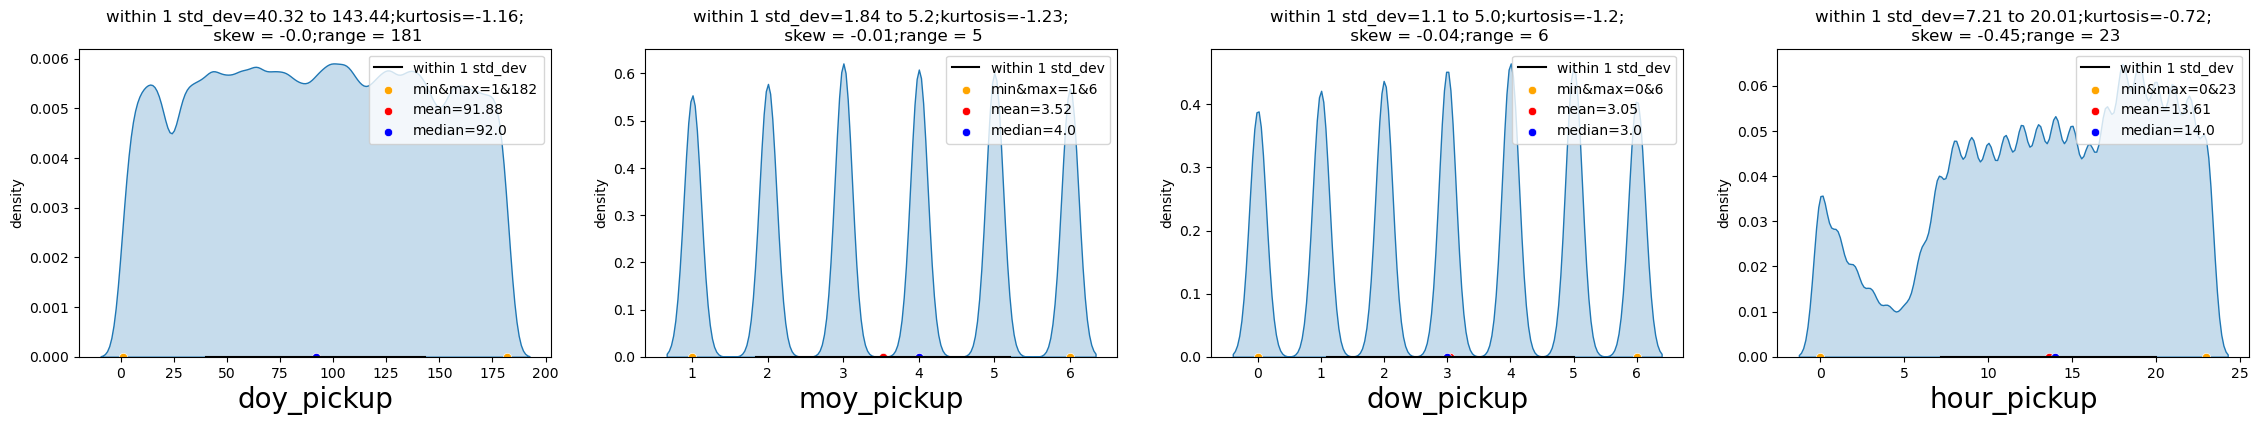

In [29]:
UVA_numeric(data,pickup_timing)

In [ ]:
# data of 6 months is available with fairly consistent number of trips across the year. 
# However, we do see that friday + weekends have higher higher number of trips. 
# Also, there is a lean period from 1 AM to around 6 AM, after which the traffic picks up. 
# No outliers present in these data points related to pickup timings

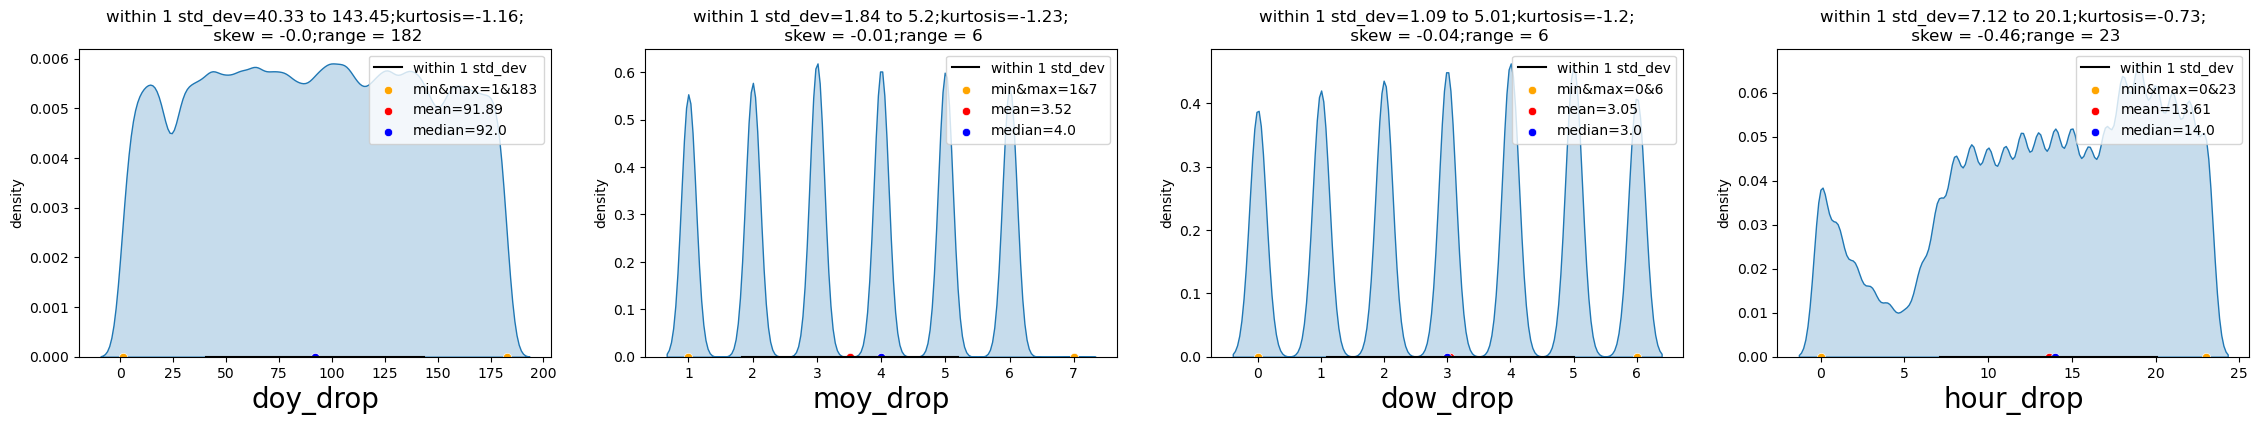

In [31]:
UVA_numeric(data, drop_timing)

In [ ]:
# Similar observations as for pickup timing

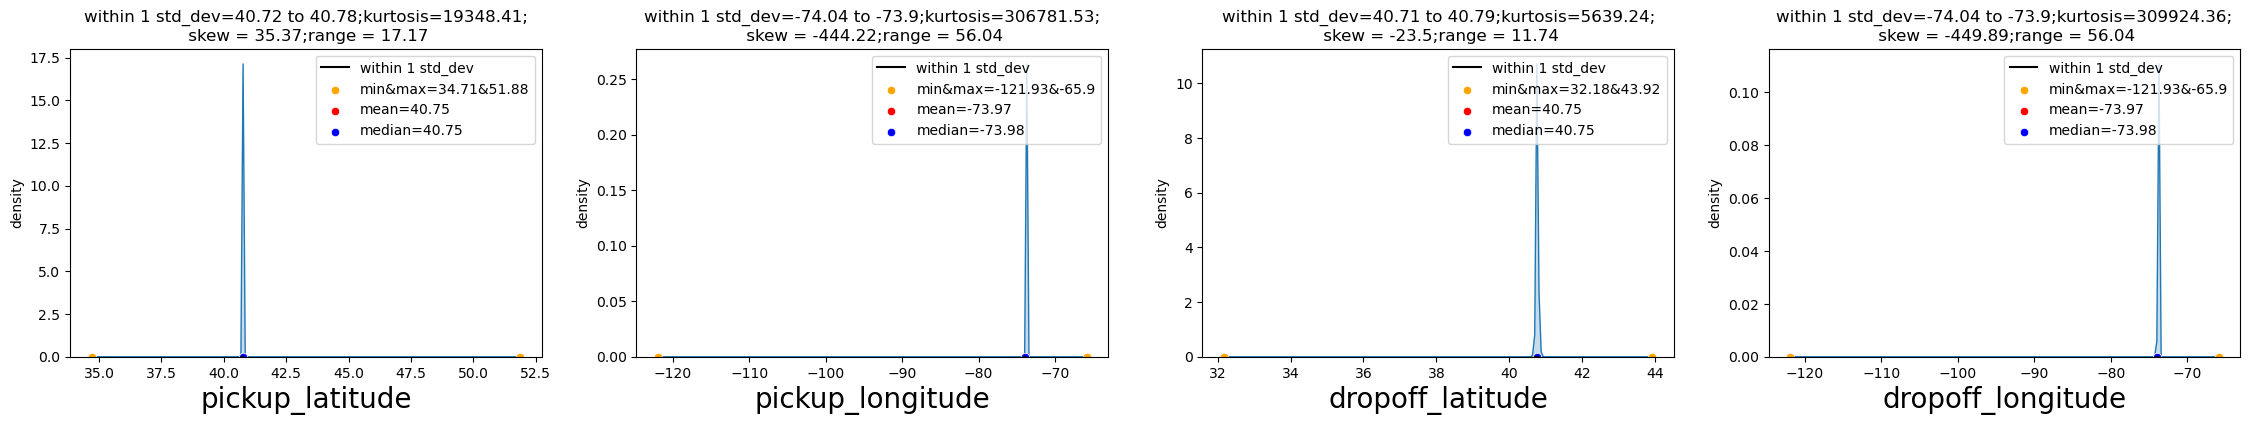

In [155]:
UVA_numeric(data, lat_long)

In [ ]:
#pickup and drop locations are mostly are in near regions as means and medians of latitudes and longitudes are equal for both pickup and drop off
# Most pickup locations and drop off locations are skewed towards particular areas only

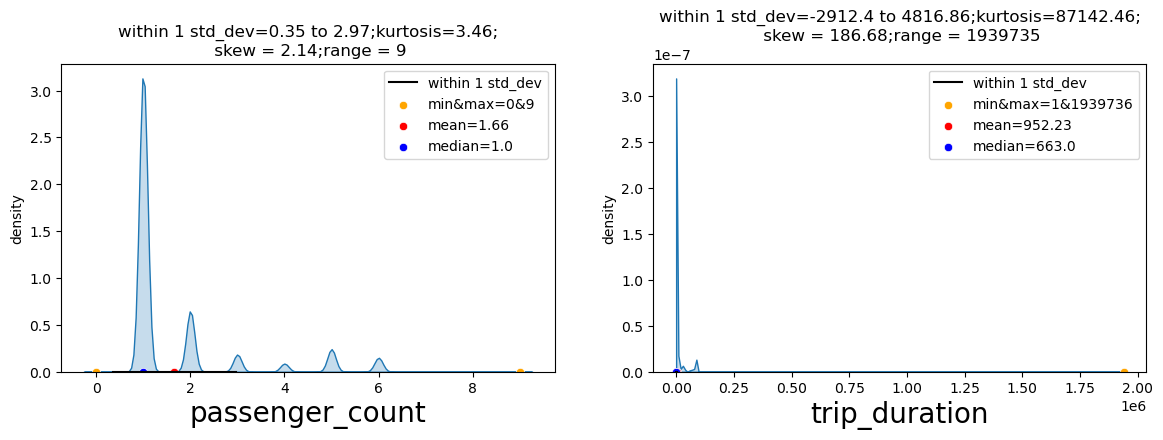

In [33]:
UVA_numeric(data, others)

In [ ]:
# Most of the passengers travel alone. However, the percentage of trips with a high passenger count is low.
# Passenger_count is right skewed. Likely to have outlier values to to high kurtosis
# trip duration data is highly skewed and very high kurtosis, which implies that there will be a high number of outliers


In [35]:
cm_data = data['trip_duration']
cm_data = cm_data[cm_data < (cm_data.mean() + 3*cm_data.std())]

#checking how many points removed
len(data), len(cm_data)

(729322, 728302)

Text(0.5, 1.0, 'within 1 std_dev=178.71 to 1494.95;kurtosis=9.96;\n skew = 2.33;range = 12418')

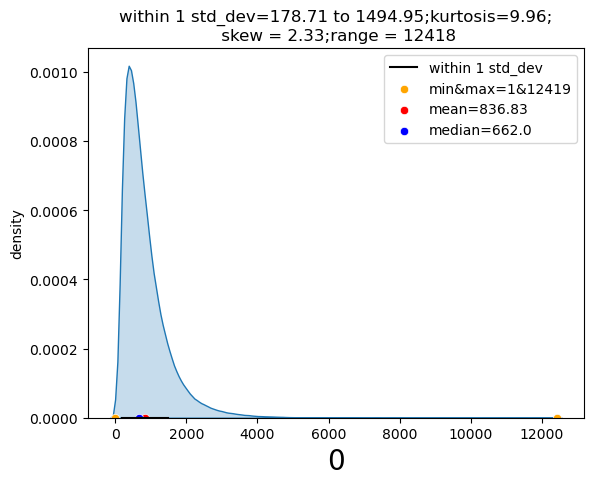

In [37]:
        mini = round(cm_data.min(), 2)
        maxi = round(cm_data.max(), 2)
        ran = round(cm_data.max()-cm_data.min(), 2)
        mean = round(cm_data.mean(), 2)
        median = round(cm_data.median(), 2)
        st_dev = round(cm_data.std(), 2)
        skew = round(cm_data.skew(), 2)
        kurt = round(cm_data.kurtosis(), 2)

        # calculating points for range of within one standard deviation
        points = round(mean-st_dev, 2), round(mean+st_dev, 2)

        #Plotting the variable with every information, can change marker size in scatterplot(i.e. s=60)
        plt.subplot(1,1,1)
        sns.kdeplot(x=cm_data, fill=True)
        sns.lineplot(x=points, y=[0,0], color = 'black', label = "within 1 std_dev")
        sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = f"min&max={mini}&{maxi}")
        sns.scatterplot(x=[mean], y=[0], color = 'red', label = f"mean={mean}")
        sns.scatterplot(x=[median], y=[0], color = 'blue', label = f"median={median}")
        plt.xlabel('{}'.format(0), fontsize = 20)
        plt.ylabel('density')
        plt.title(f'within 1 std_dev={points[0]} to {points[1]};kurtosis={kurt};\n skew = {skew};range = {ran}')

In [39]:
data.select_dtypes(include=['category'])

,vendor_id,store_and_fwd_flag
0,2,N
1,1,N
2,2,N
3,2,N
4,1,N
...,...,...
729317,2,N
729318,1,N
729319,1,N
729320,1,N


In [41]:
def UVA_category(data, var_group, max_categories=10):

    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print the value_counts and barplot for max_categories.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize = (7*size,5), dpi = 100)

    # for every variable
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)[:max_categories]
        n_uni = data[i].nunique()

        #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.barplot(x=norm_count, y=norm_count.index , order = norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel('{}'.format(i), fontsize = 20)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

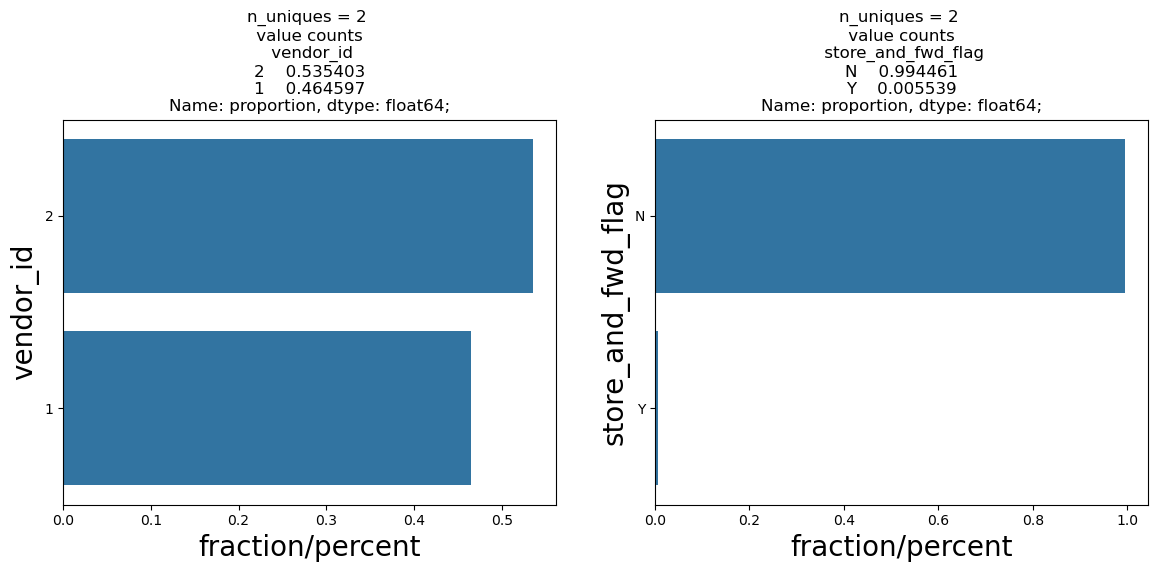

In [43]:
UVA_category(data, ['vendor_id','store_and_fwd_flag'])

In [ ]:
# Vendor IDs are almost equal in proportion when it comes to number of trips
# However, the store and forward flag is set as 'No' for majority of the cases. 
# It would be interesting to note the impact of the flag and the error rates when considering this variable may be high during predictive modeling.

In [ ]:
Bi-Variate Analysis

In [45]:
# Correlation matrix
numerical = data.select_dtypes(include=['Int64','float64','int32'])[:]
numerical.corr()

,id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_pickup,moy_pickup,dow_pickup,hour_pickup,doy_drop,moy_drop,dow_drop,hour_drop
id,1.000000,0.001749,-0.000762,0.000468,-0.000925,0.000348,-0.000975,0.001981,0.001924,-0.001358,0.001142,0.001980,0.001940,-0.001366,0.001161
passenger_count,0.001749,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,-0.001182,-0.001481,0.025758,0.009851,-0.001168,-0.001497,0.025941,0.009214
pickup_longitude,-0.000762,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,0.003737,0.004037,-0.016031,0.010754,0.003764,0.004090,-0.016846,0.011170
pickup_latitude,0.000468,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.001244,-0.000165,-0.029073,0.011433,-0.001313,-0.000233,-0.029254,0.018061
dropoff_longitude,-0.000925,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,0.003762,0.003883,-0.001473,-0.022014,0.003787,0.003923,-0.001396,-0.023193
dropoff_latitude,0.000348,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.001627,-0.000580,-0.022028,0.014257,-0.001673,-0.000621,-0.022396,0.018173
trip_duration,-0.000975,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,0.009418,0.009378,-0.002302,0.002979,0.010285,0.010135,-0.003369,0.003027
doy_pickup,0.001981,-0.001182,0.003737,-0.001244,0.003762,-0.001627,0.009418,1.000000,0.985661,-0.012497,-0.003549,0.999998,0.985660,-0.012225,-0.004270
moy_pickup,0.001924,-0.001481,0.004037,-0.000165,0.003883,-0.000580,0.009378,0.985661,1.000000,-0.013626,-0.003301,0.985659,0.999937,-0.013320,-0.004013
dow_pickup,-0.001358,0.025758,-0.016031,-0.029073,-0.001473,-0.022028,-0.002302,-0.012497,-0.013626,1.000000,-0.082079,-0.012473,-0.013604,0.993789,-0.085767


In [ ]:
Heatmap

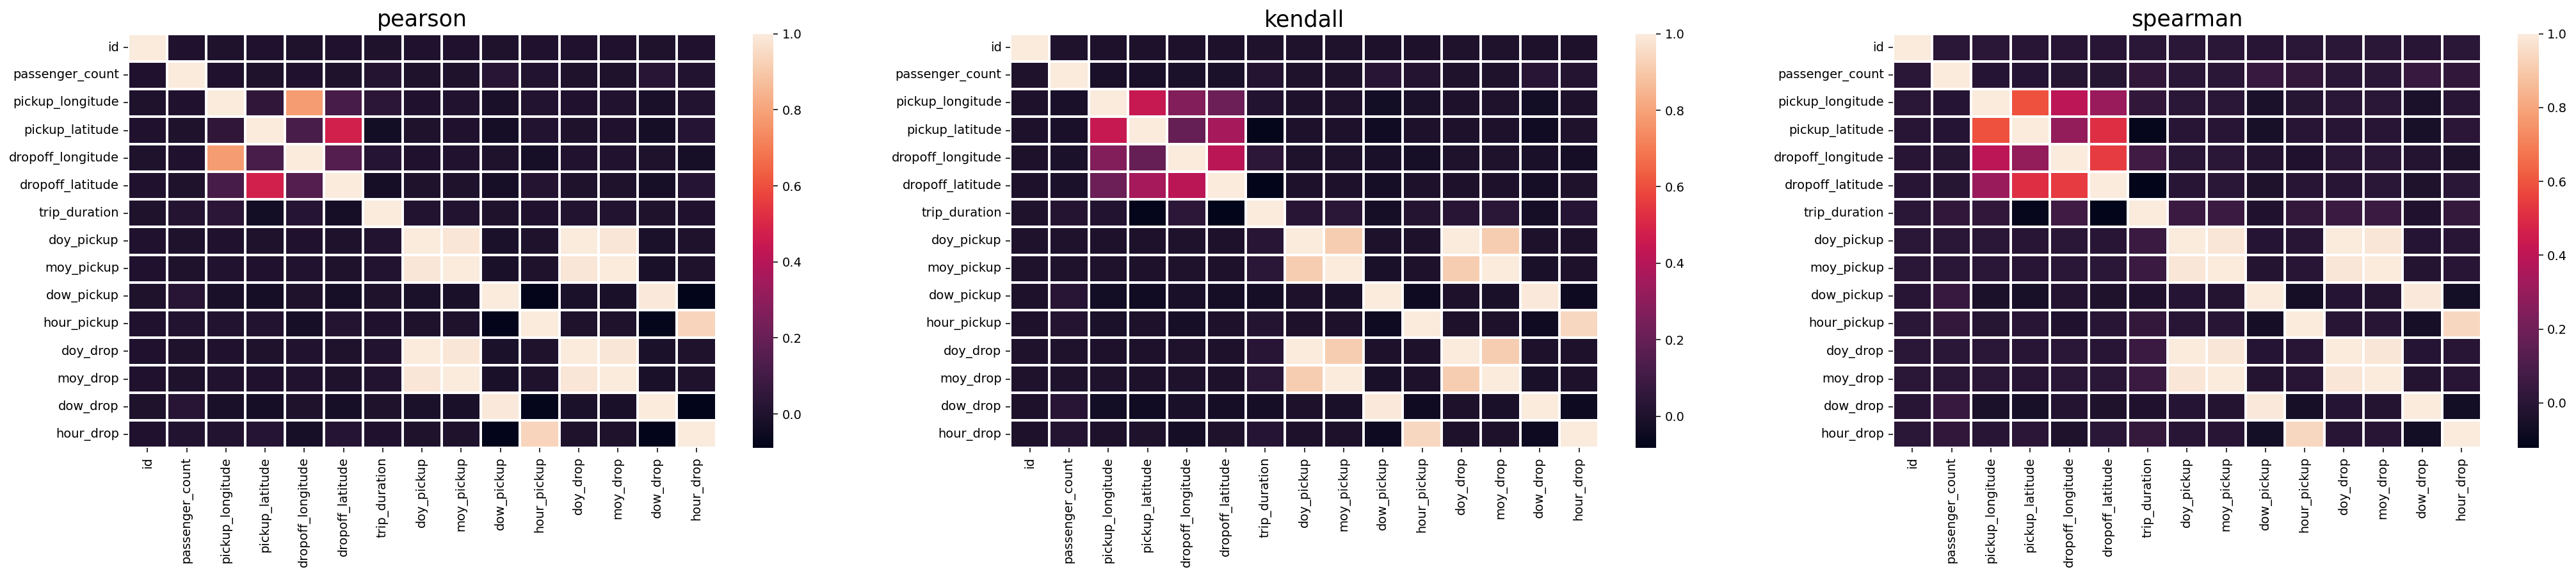

In [47]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)



Scatterplot

<Figure size 896x672 with 0 Axes>

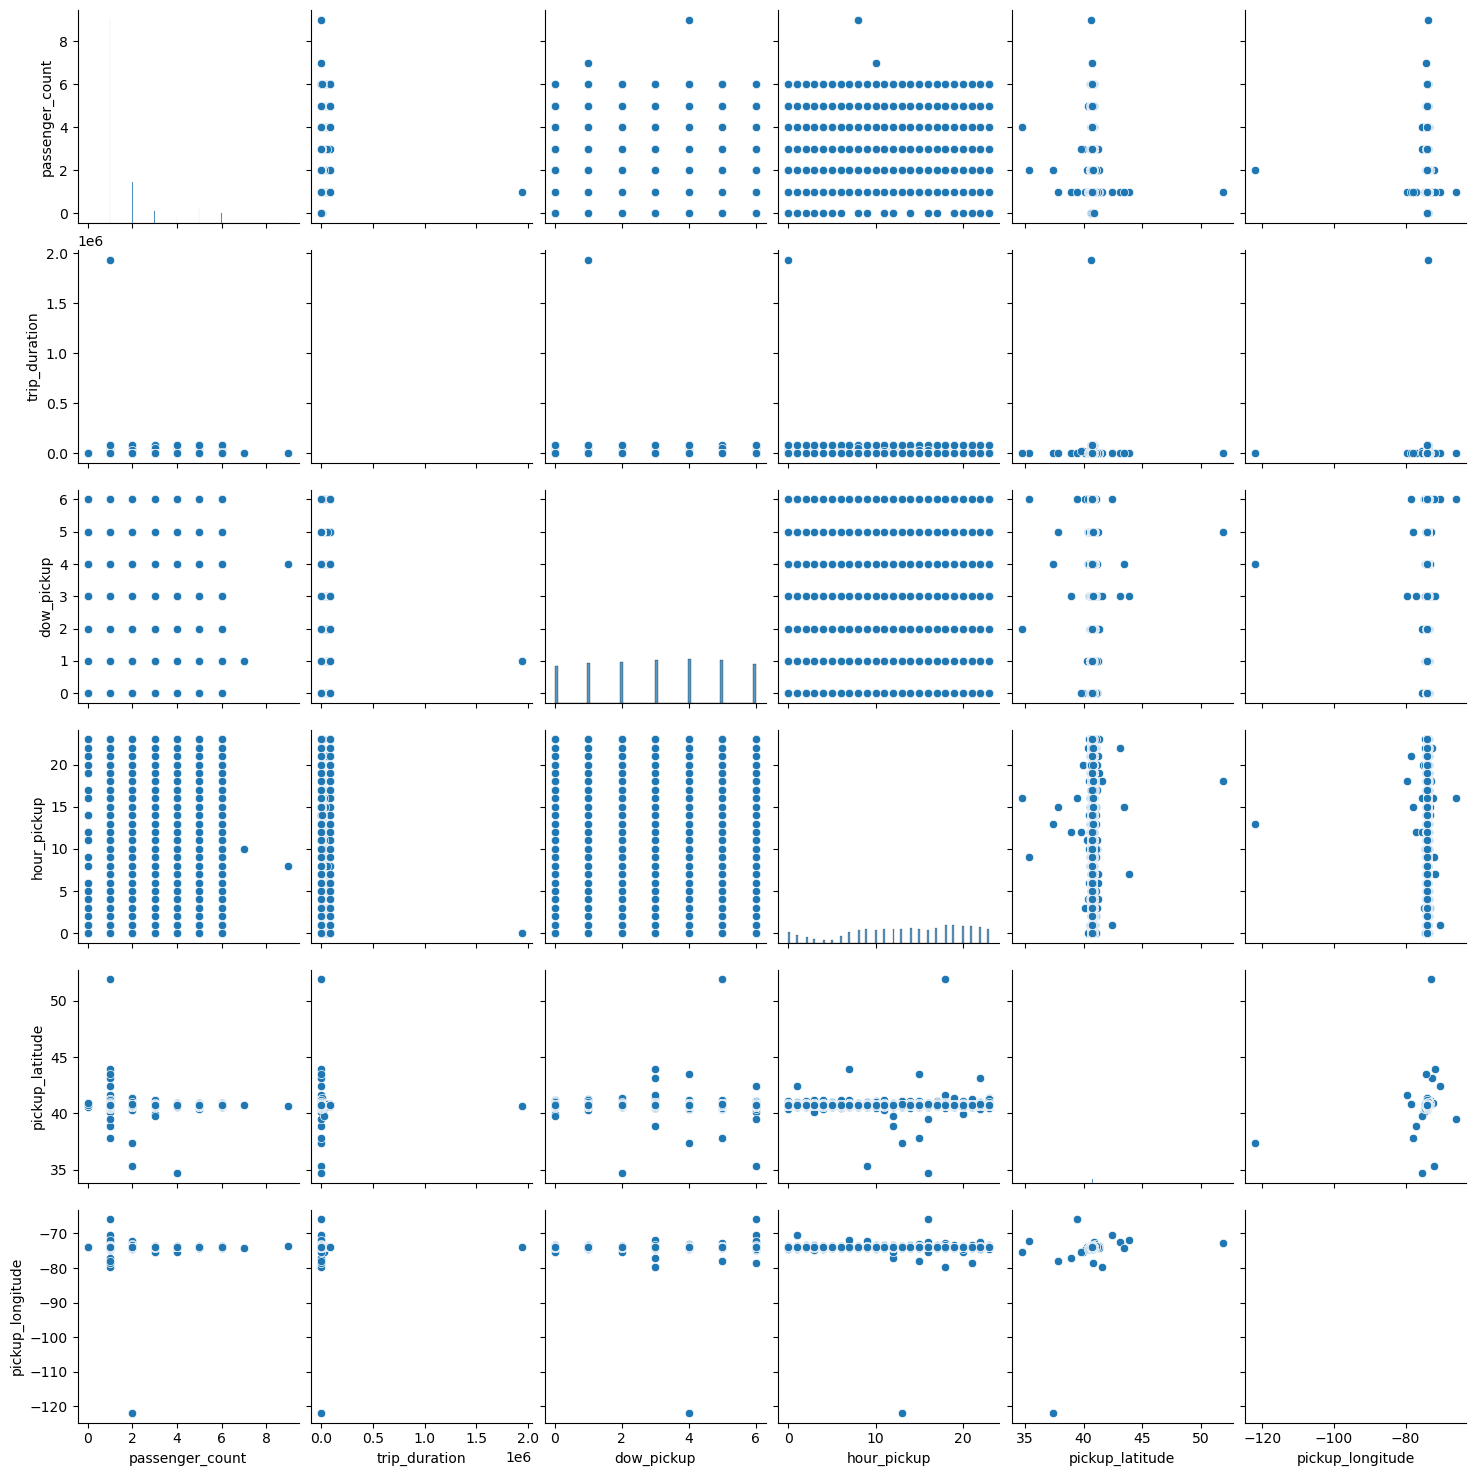

In [203]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[['passenger_count','trip_duration','dow_pickup','hour_pickup','pickup_latitude','pickup_longitude']])

In [ ]:
No clear correlation across variables.

In [219]:
# Now lets do a bivariate analysis across categorical variables.
categorical = data.select_dtypes(include=['category'])[:]
categorical
pd.crosstab(categorical['vendor_id'], categorical['store_and_fwd_flag'], normalize='index')

store_and_fwd_flag,N,Y
vendor_id,,
1,0.988077,0.011923
2,1.000000,0.000000


Flag is set 'No' only in case vendor_id is set to 1 in case of 1.2% of cases. Need to check if its significant.

In [221]:
def BVA_categorical_plot(data, tar, cat):
    '''
    take data and two categorical variables,
    calculates the chi2 significance between the two variables 
    and prints the result with countplot & CrossTab
    '''
    #isolating the variables
    data = data[[cat,tar]][:]

    #forming a crosstab
    table = pd.crosstab(data[tar],data[cat])

    #performing chi2 test
    from scipy.stats import chi2_contingency
    chi, p, dof, expected = chi2_contingency(table)

    #checking whether results are significant
    if p<0.05:
        sig = True
    else:
        sig = False

    #plotting grouped plot
    sns.countplot(x=cat, hue=tar, data=data)
    plt.title(f"p-value = {round(p, 8)}\n difference significant? = {sig}\n")

    #plotting percent stacked bar plot
    ax1 = pd.crosstab(data[cat], data[tar], normalize='index')
    # ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack() old code
    ax1.plot(kind='bar', stacked='True',title=str(ax1))
    # int_level = data[cat].value_counts() old code

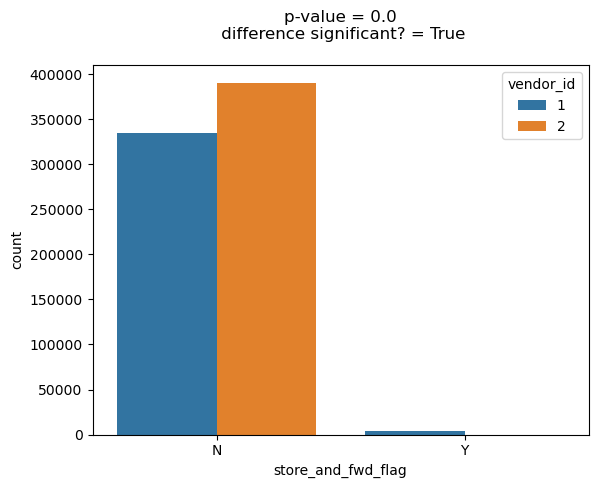

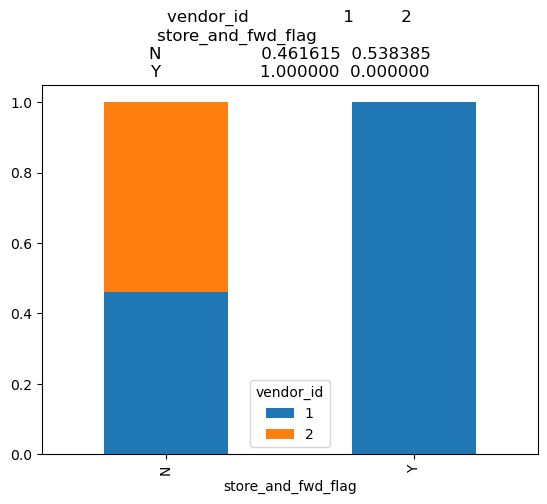

In [223]:
BVA_categorical_plot(data,'vendor_id','store_and_fwd_flag')

In [ ]:
Correlation between Vendor ID & Store and fwd flag is statistically significant.

In [229]:
data['passenger_count'].max()

9

In [183]:
def passenger_segments(x):
    if x <= 2:
        return 'less_than_3'
    elif x <= 5:
        return '3_to_5'
    elif x>5:
        return 'more_than_5'

In [271]:
subset_data = data[['passenger_count','trip_duration','doy_pickup','vendor_id','store_and_fwd_flag']]
subset_data['passenger_group'] = subset_data['passenger_count'].apply(lambda x: passenger_segments(x))

C:\Users\s.ds.srivastava\AppData\Local\Temp\ipykernel_30280\1859849888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['passenger_group'] = subset_data['passenger_count'].apply(lambda x: passenger_segments(x))


In [263]:
subset_data.head()

,passenger_count,trip_duration,doy_pickup,vendor_id,store_and_fwd_flag,passenger_group
0,1,400,60,2,N,less_than_3
1,2,1100,71,1,N,less_than_3
2,2,1635,52,2,N,less_than_3
3,6,1141,5,2,N,3_to_5
4,1,848,48,1,N,less_than_3


In [273]:
subset_data.groupby('passenger_group')['trip_duration'].mean()

passenger_group
3_to_5         1052.036882
less_than_3     933.871731
more_than_5    1084.022315
Name: trip_duration, dtype: float64

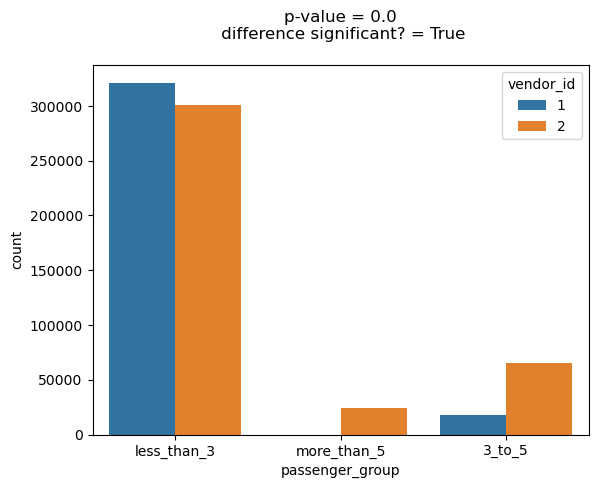

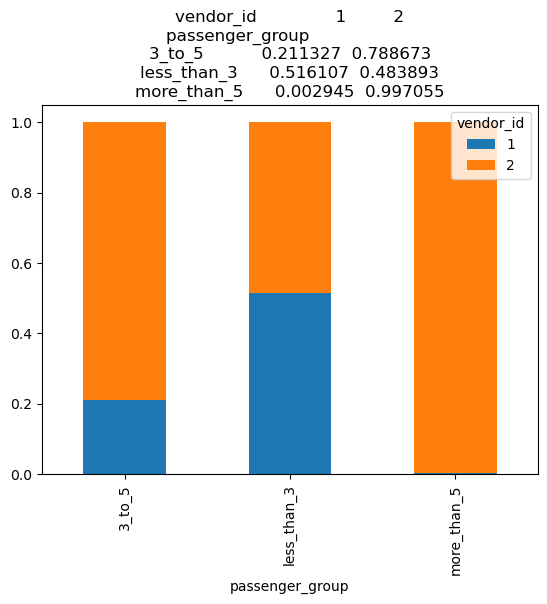

In [275]:
BVA_categorical_plot(subset_data,'vendor_id','passenger_group')

Vendor ID has a significanty correlation with passenger count as proportion of vendor 1 trips reduces as number of passengers goes up.
This could be because vendor 2 offers only smaller cars.

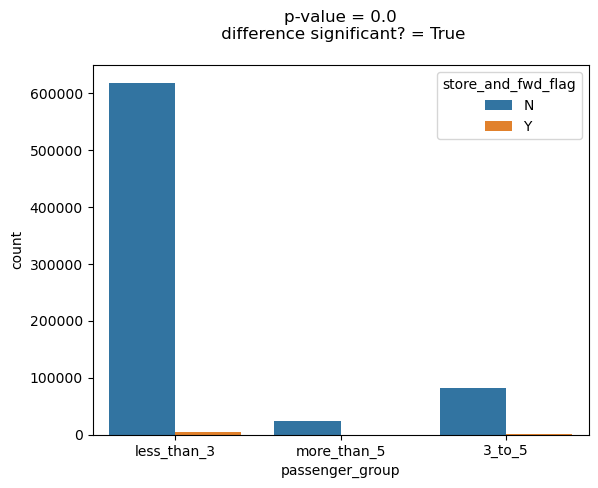

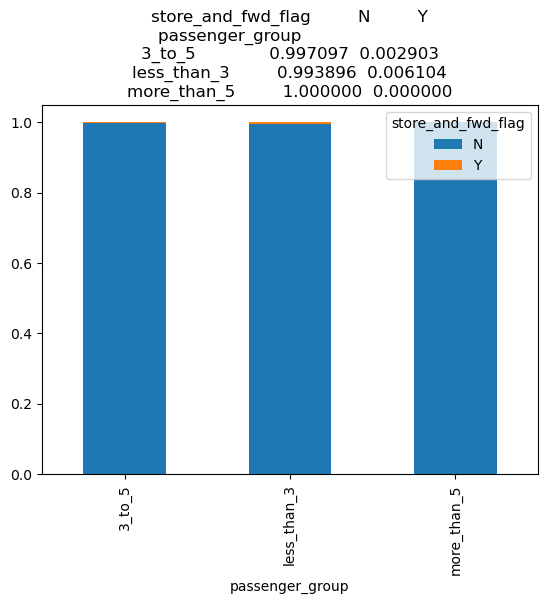

In [277]:
BVA_categorical_plot(subset_data,'store_and_fwd_flag','passenger_group')

In [ ]:
Store and forward flag is significantly different between passenger count categories

In [279]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [281]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [293]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot(x=[str(1),'not {}'.format(1)], y=[m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

C:\Users\s.ds.srivastava\AppData\Local\Temp\ipykernel_30280\486597531.py:16: FutureWarning: The provided callable <function mean at 0x000002348B3BC900> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)


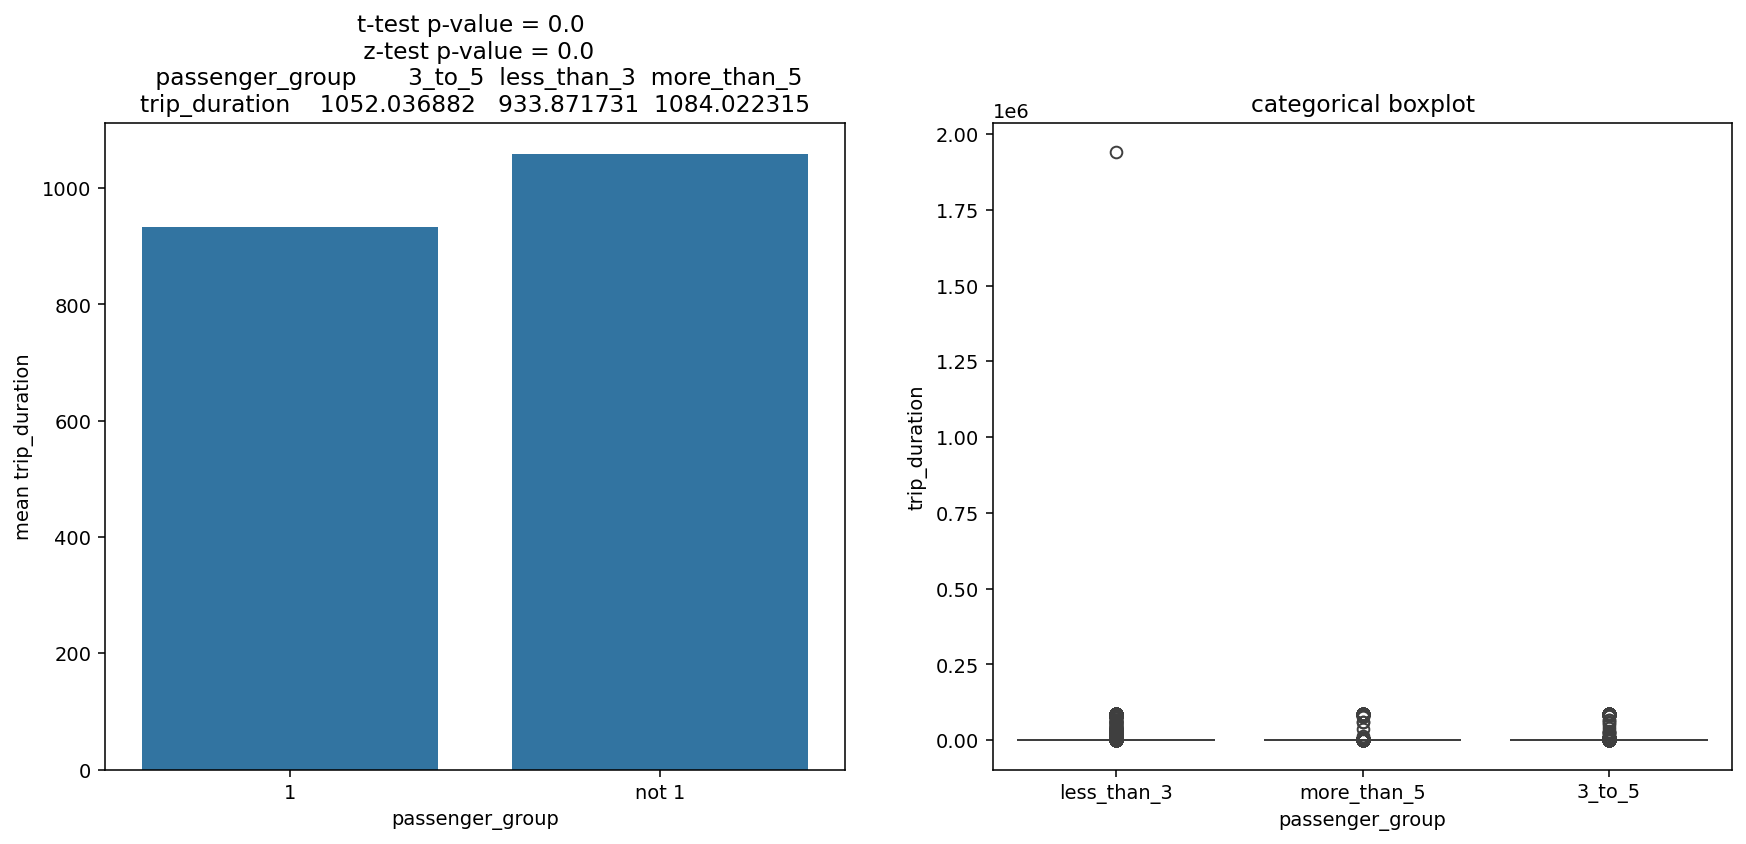

In [295]:
Bivariate_cont_cat(subset_data, 'trip_duration', 'passenger_group', 'less_than_3')

In [ ]:
Significant variation of trip duration for different passenger count segments.

C:\Users\s.ds.srivastava\AppData\Local\Temp\ipykernel_30280\486597531.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
C:\Users\s.ds.srivastava\AppData\Local\Temp\ipykernel_30280\486597531.py:16: FutureWarning: The provided callable <function mean at 0x000002348B3BC900> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)


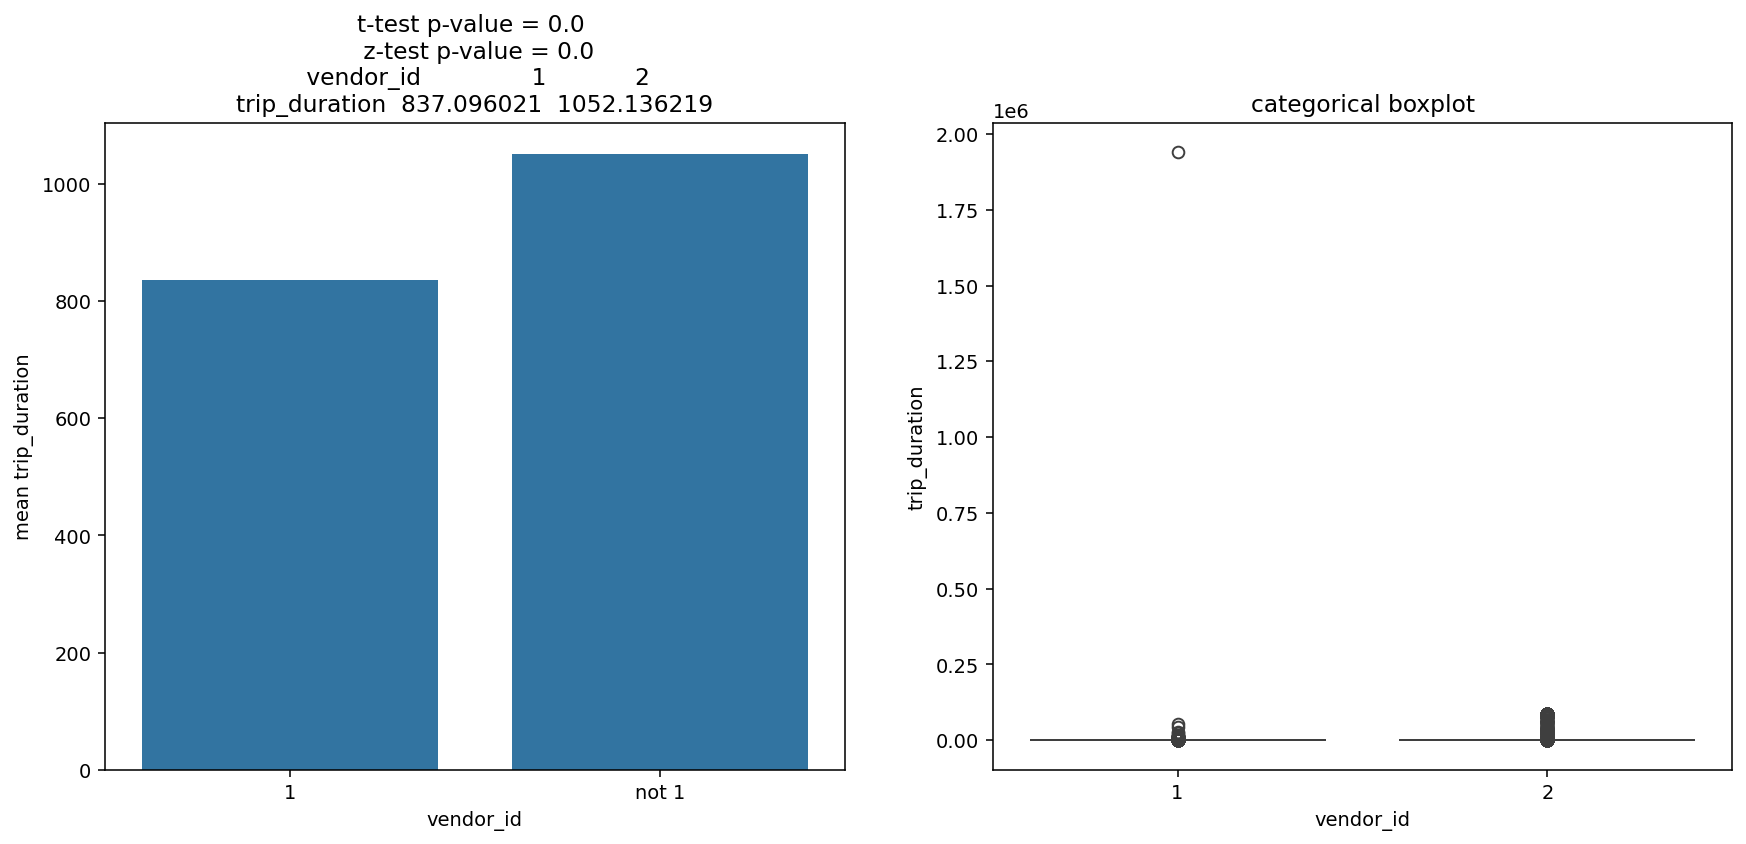

In [299]:
Bivariate_cont_cat(subset_data, 'trip_duration', 'vendor_id', 1)

In [ ]:
Significant difference in trip duration observed as vendor ID changes

C:\Users\s.ds.srivastava\AppData\Local\Temp\ipykernel_30280\486597531.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
C:\Users\s.ds.srivastava\AppData\Local\Temp\ipykernel_30280\486597531.py:16: FutureWarning: The provided callable <function mean at 0x000002348B3BC900> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)


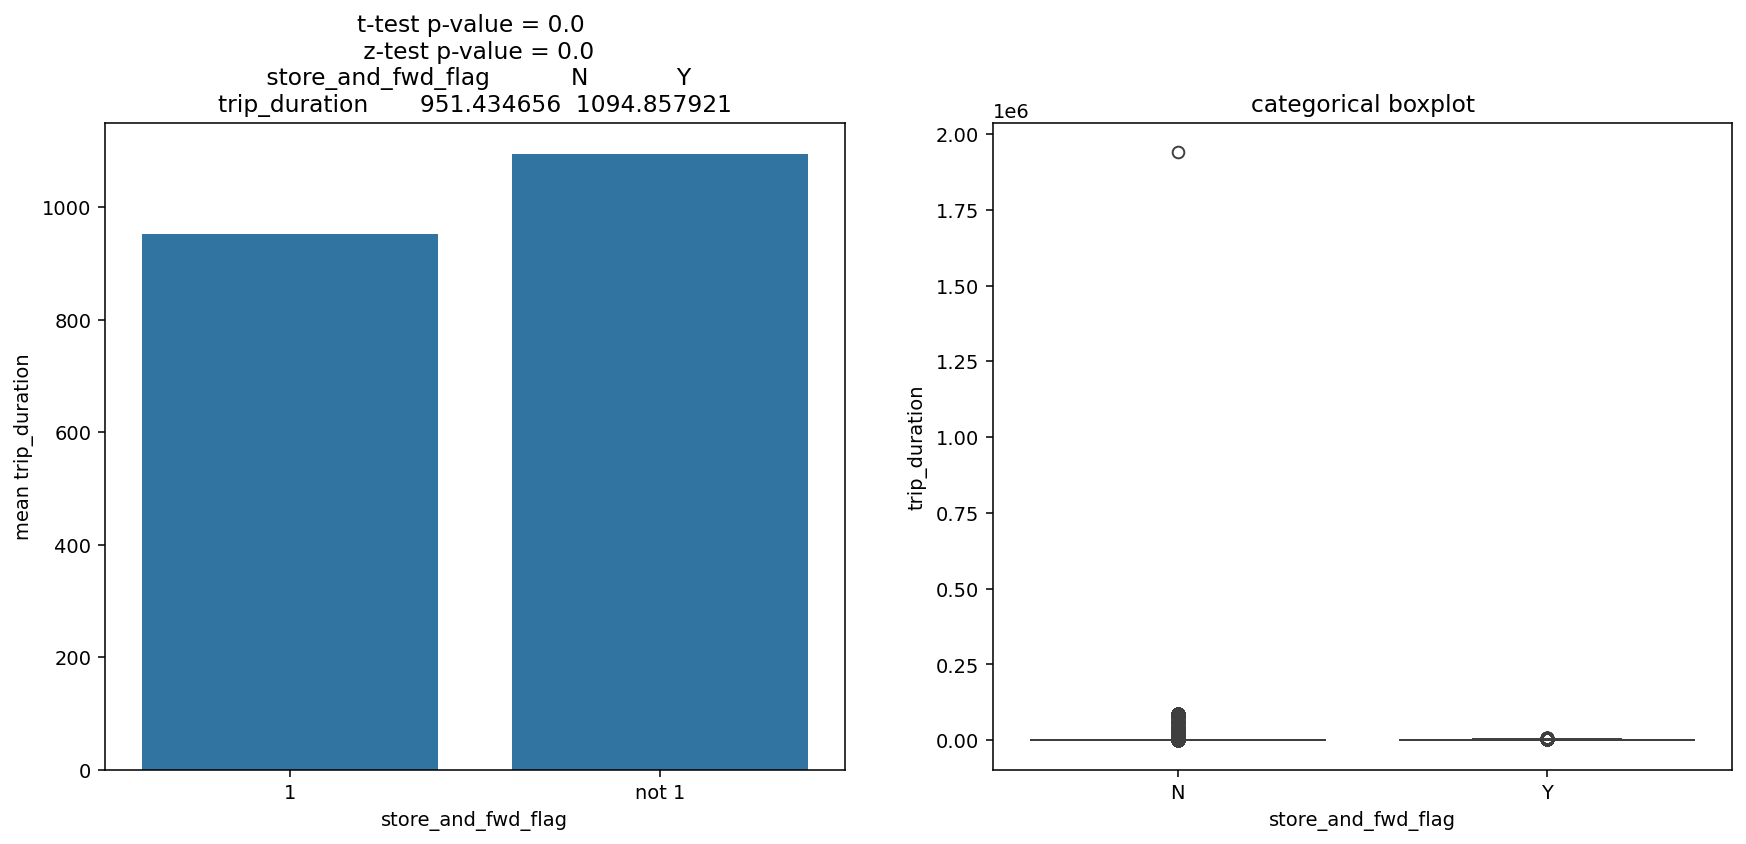

In [303]:
Bivariate_cont_cat(subset_data, 'trip_duration', 'store_and_fwd_flag', 'N')

In [ ]:
Significant difference in trip duration depending on the store and forward flag

In [ ]:
Feature Creation: We need to create more features that may help with prediction. Some of those variables would be:
- Distance
- Weekend
- Time_of_day bucket - Busy & lean periods

In [49]:
data.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,doy_pickup,moy_pickup,dow_pickup,hour_pickup,doy_drop,moy_drop,dow_drop,hour_drop
0,1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60,2,0,16,60,2,0,16
1,889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,71,3,4,23,71,3,4,23
2,857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,52,2,6,17,52,2,6,18
3,3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,1,1,9,5,1,1,10
4,232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,48,2,2,6,48,2,2,6


In [57]:
import geopy
from geopy.distance import great_circle

In [59]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [63]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [79]:
data['distance'].value_counts()

distance
0.000000    2901
0.000424      20
0.000424      19
0.000424      16
0.000424      11
            ... 
2.929161       1
0.977650       1
0.925223       1
4.112012       1
5.945846       1
Name: count, Length: 726243, dtype: int64

In [95]:
data.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'doy_pickup', 'moy_pickup',
       'dow_pickup', 'hour_pickup', 'doy_drop', 'moy_drop', 'dow_drop',
       'hour_drop', 'distance'],
      dtype='object')

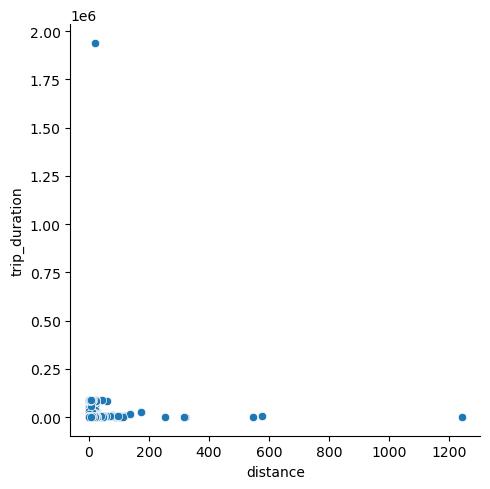

In [105]:
sns.relplot(x='distance',y='trip_duration', data=data)

In [115]:
data['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

In [117]:
#Removing the outlier trip duration entry
data=data[data['trip_duration']!=1939736]

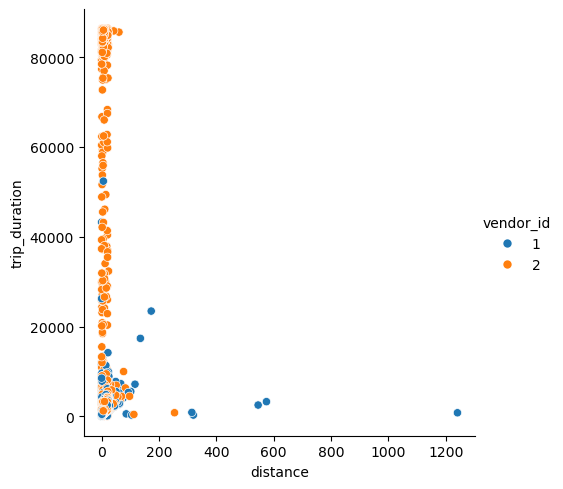

In [125]:
sns.relplot(x='distance',y='trip_duration', data=data, hue='vendor_id')

In [145]:
Vendor 2 has significant number of rows with distance = 0

<Axes: xlabel='dow_pickup', ylabel='trip_duration'>

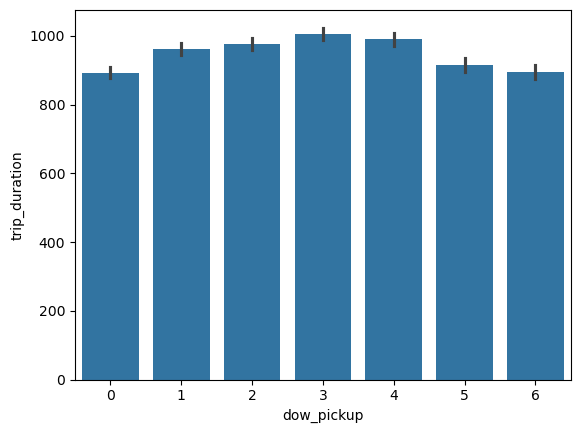

In [157]:
sns.barplot(x='dow_pickup',y='trip_duration',data=data)

In [161]:
data['dow_pickup'] = data['dow_pickup'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)

<Axes: xlabel='hour_pickup', ylabel='trip_duration'>

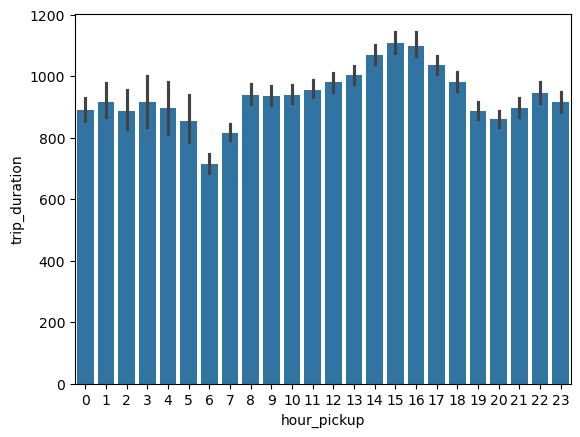

In [165]:
sns.barplot(x='hour_pickup',y='trip_duration',data=data)

In [211]:
mapping = {**dict.fromkeys(range(13, 19), 1),  # Hours 13 to 18 -> 1
           **dict.fromkeys(range(19, 24), 2),  # Hours 19 to 23 -> 2
           **dict.fromkeys(range(0, 8), 3),    # Hours 0 to 7 -> 3
           **dict.fromkeys(range(8, 13), 4)}   # Hours 8 to 12 -> 4
mapping

{13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 2,
 20: 2,
 21: 2,
 22: 2,
 23: 2,
 0: 3,
 1: 3,
 2: 3,
 3: 3,
 4: 3,
 5: 3,
 6: 3,
 7: 3,
 8: 4,
 9: 4,
 10: 4,
 11: 4,
 12: 4}

In [171]:
data['hour_pickup'] = data['hour_pickup'].map(mapping)

<Axes: xlabel='distance', ylabel='Density'>

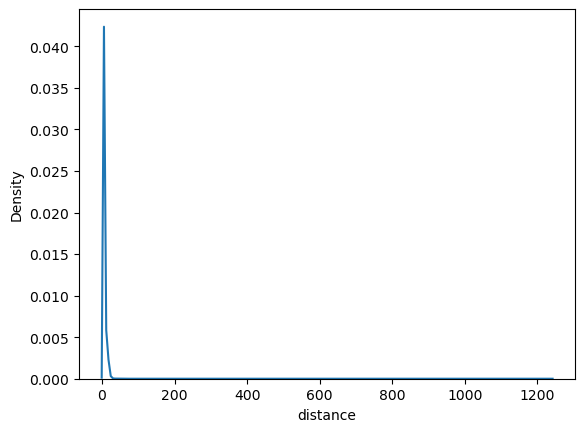

In [177]:
sns.kdeplot(x='distance',data=data)

In [181]:
data.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,doy_pickup,moy_pickup,dow_pickup,hour_pickup,doy_drop,moy_drop,dow_drop,hour_drop,distance,log_transformed_dist
0,1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60,2,0,1,60,2,0,16,1.199074,0.181550
1,889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,71,3,1,2,71,3,4,23,4.129117,1.418064
2,857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,52,2,0,1,52,2,6,18,7.250763,1.981107
3,3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,1,1,4,5,1,1,10,2.361101,0.859128
4,232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,48,2,1,3,48,2,2,6,4.328540,1.465230


In [185]:
data['passenger_group'] = data['passenger_count'].apply(lambda x: passenger_segments(x))

In [187]:
data.groupby('passenger_group')['id'].count()

passenger_group
3_to_5          82668
less_than_3    622544
more_than_5     24109
Name: id, dtype: Int64

<Axes: xlabel='moy_pickup', ylabel='trip_duration'>

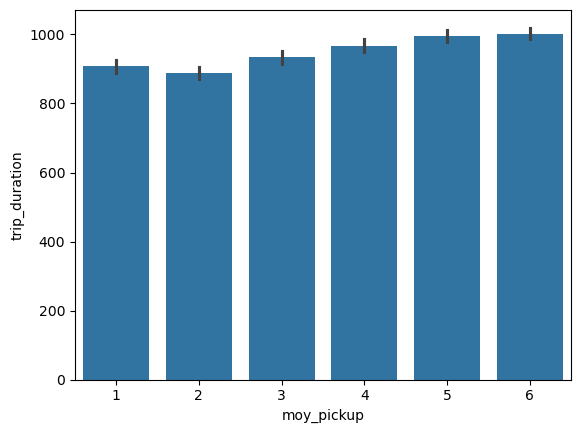

In [191]:
sns.barplot(x='moy_pickup',y='trip_duration',data=data)

In [193]:
data.dtypes

id                         Int64
vendor_id               category
passenger_count            int64
pickup_longitude         float64
pickup_latitude          float64
dropoff_longitude        float64
dropoff_latitude         float64
store_and_fwd_flag      category
trip_duration              int64
doy_pickup                 int32
moy_pickup                 int32
dow_pickup                 int64
hour_pickup                int64
doy_drop                   int32
moy_drop                   int32
dow_drop                   int32
hour_drop                  int32
distance                 float64
log_transformed_dist     float64
passenger_group           object
dtype: object

In [195]:
data['passenger_group']=data['passenger_group'].astype('category')
data['moy_pickup']=data['moy_pickup'].astype('category')
data['hour_pickup']=data['hour_pickup'].astype('category')

<Axes: xlabel='log_transformed_dist', ylabel='Density'>

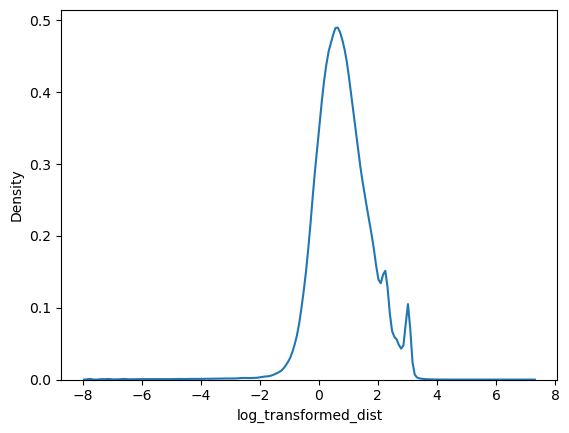

In [197]:
sns.kdeplot(x='log_transformed_dist',data=data)

In [199]:
#Using log1p to avoid errors in case of distance=0
data['log_dist_final'] = np.log1p(data['distance'])

<Axes: xlabel='log_transformed_dist', ylabel='Density'>

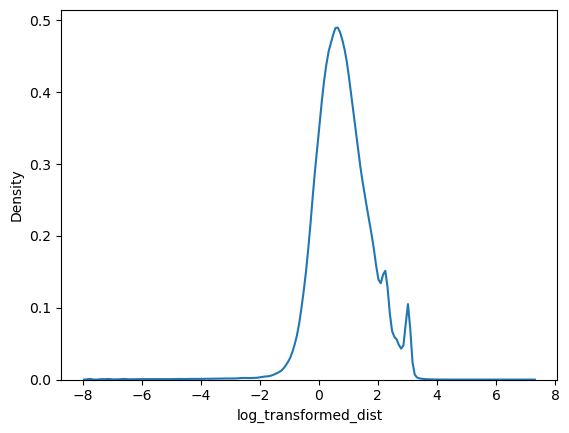

In [201]:
sns.kdeplot(x='log_transformed_dist',data=data)

In [205]:
data.dtypes

id                         Int64
vendor_id               category
passenger_count            int64
pickup_longitude         float64
pickup_latitude          float64
dropoff_longitude        float64
dropoff_latitude         float64
store_and_fwd_flag      category
trip_duration              int64
doy_pickup                 int32
moy_pickup              category
dow_pickup                 int64
hour_pickup             category
doy_drop                   int32
moy_drop                   int32
dow_drop                   int32
hour_drop                  int32
distance                 float64
log_transformed_dist     float64
passenger_group         category
log_dist_final           float64
dtype: object

In [255]:
data_model = data[['vendor_id','store_and_fwd_flag','trip_duration','moy_pickup','dow_pickup','hour_pickup','passenger_group','log_dist_final']]

In [257]:
data_model.head()

,vendor_id,store_and_fwd_flag,trip_duration,moy_pickup,dow_pickup,hour_pickup,passenger_group,log_dist_final
0,2,N,400,2,0,1,less_than_3,0.788037
1,1,N,1100,3,1,2,less_than_3,1.634933
2,2,N,1635,2,0,1,less_than_3,2.110306
3,2,N,1141,1,1,4,more_than_5,1.212269
4,1,N,848,2,1,3,less_than_3,1.673077


In [259]:
data_model['vendor_id'] = data_model['vendor_id'].apply(lambda x: 1 if x==1 else 0)

C:\Users\s.ds.srivastava\AppData\Local\Temp\ipykernel_18392\1069753157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['vendor_id'] = data_model['vendor_id'].apply(lambda x: 1 if x==1 else 0)


In [261]:
data_model.head()

,vendor_id,store_and_fwd_flag,trip_duration,moy_pickup,dow_pickup,hour_pickup,passenger_group,log_dist_final
0,0,N,400,2,0,1,less_than_3,0.788037
1,1,N,1100,3,1,2,less_than_3,1.634933
2,0,N,1635,2,0,1,less_than_3,2.110306
3,0,N,1141,1,1,4,more_than_5,1.212269
4,1,N,848,2,1,3,less_than_3,1.673077


In [263]:
data_model['log_trip_duration'] = np.log1p(data_model['trip_duration'])

C:\Users\s.ds.srivastava\AppData\Local\Temp\ipykernel_18392\4287703542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['log_trip_duration'] = np.log1p(data_model['trip_duration'])


<Axes: xlabel='log_trip_duration', ylabel='Density'>

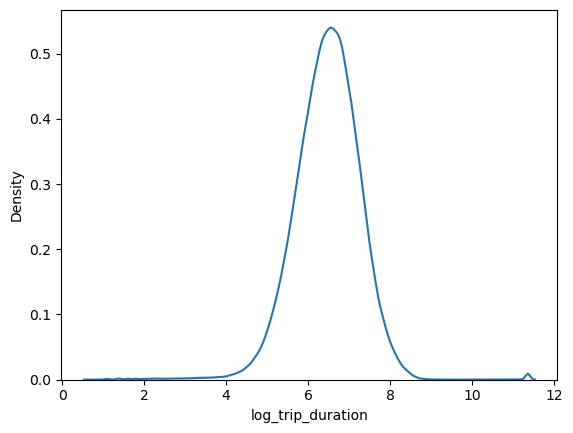

In [245]:
sns.kdeplot(x='log_trip_duration',data=data_model)

In [269]:
data_model['store_and_fwd_flag'] = data_model['store_and_fwd_flag'].map({'N':0, 'Y':1})
data_model.groupby('store_and_fwd_flag').count()

C:\Users\s.ds.srivastava\AppData\Local\Temp\ipykernel_18392\1264919874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['store_and_fwd_flag'] = data_model['store_and_fwd_flag'].map({'N':0, 'Y':1})
C:\Users\s.ds.srivastava\AppData\Local\Temp\ipykernel_18392\1264919874.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_model.groupby('store_and_fwd_flag').count()


,vendor_id,trip_duration,moy_pickup,dow_pickup,hour_pickup,passenger_group,log_dist_final,log_trip_duration
store_and_fwd_flag,,,,,,,,
0,725281,725281,725281,725281,725281,725281,725281,725281
1,4040,4040,4040,4040,4040,4040,4040,4040


In [345]:
X = data_model[['vendor_id','store_and_fwd_flag','moy_pickup','dow_pickup','hour_pickup','passenger_group','log_dist_final']]

In [273]:
y = data_model.log_trip_duration

In [275]:
X.dtypes

vendor_id             category
store_and_fwd_flag    category
moy_pickup            category
dow_pickup               int64
hour_pickup           category
passenger_group       category
log_dist_final         float64
dtype: object

In [347]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

std = StandardScaler()
scaled = std.fit_transform(X[['log_dist_final']])

In [349]:
scaled = pd.DataFrame(scaled,columns=['log_distance_final'])

In [399]:
X['Final_Distance']=scaled['log_distance_final']
X.head()

,vendor_id,store_and_fwd_flag,moy_pickup,dow_pickup,hour_pickup,passenger_group,Final_Distance
0,0,0,2,0,1,less_than_3,-0.744787
1,1,0,3,1,2,less_than_3,0.606263
2,0,0,2,0,1,less_than_3,1.364622
3,0,0,1,1,4,more_than_5,-0.068012
4,1,0,2,1,3,less_than_3,0.667114


In [353]:
X = X.drop(columns=['log_dist_final'])

In [401]:
category_cols = X.select_dtypes(include='category').columns

# Apply one-hot encoding to those columns
df_encoded = pd.get_dummies(X, columns=category_cols, drop_first=True)


In [395]:
X.Final_Distance[729321]

-0.8

In [397]:
X.isnull().sum()

vendor_id             0
store_and_fwd_flag    0
moy_pickup            0
dow_pickup            0
hour_pickup           0
passenger_group       0
Final_Distance        0
dtype: int64

In [405]:
df_encoded_num = df_encoded.select_dtypes(include=['bool']).astype('int32')

In [409]:
df_encoded_num['distance']=X['Final_Distance']
df_encoded_num['dow_pickup']=X['dow_pickup']

In [411]:
df_encoded_num.head()

,vendor_id_0,store_and_fwd_flag_1,moy_pickup_2,moy_pickup_3,moy_pickup_4,moy_pickup_5,moy_pickup_6,hour_pickup_2,hour_pickup_3,hour_pickup_4,passenger_group_less_than_3,passenger_group_more_than_5,distance,dow_pickup
0,1,0,1,0,0,0,0,0,0,0,1,0,-0.744787,0
1,0,0,0,1,0,0,0,1,0,0,1,0,0.606263,1
2,1,0,1,0,0,0,0,0,0,0,1,0,1.364622,0
3,1,0,0,0,0,0,0,0,0,1,0,1,-0.068012,1
4,0,0,1,0,0,0,0,0,1,0,1,0,0.667114,1


In [441]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded_num, y, test_size=0.2, random_state=42)

In [443]:
#Standard Scaling on log distribution of trip duration
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()  # Flatten to 1D array

In [429]:
from sklearn.linear_model import LinearRegression

In [445]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [449]:
linreg = LinearRegression()
linreg.fit(X_train,y_train_scaled)
y_train_pred_scaled = linreg.predict(X_train)
y_train_pred = scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten() #Inverse of standard scaling
y_train_pred_inverse = np.exp(y_train_pred) # inverse of log scaling on train data
y_train_inverse = np.exp(y_train)
rmse_train = np.sqrt(np.mean((y_train_pred_inverse - y_train_inverse) ** 2)) #RMSE error on training set
print("Training Error", rmse_train)

Training Error 3127.38332996764


In [451]:
y_test_pred_scaled = linreg.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred_inverse = np.exp(y_test_pred)
y_test_inverse = np.exp(y_test)
rmse_test = np.sqrt(np.mean((y_test_pred_inverse - y_test_inverse) ** 2))
print("Testing Error", rmse_test)

Testing Error 3193.0173805190925
